In [41]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('cleaned_common_accident_vehicle_records.csv')

# Display the first few rows to understand the structure
df.head()

# Convert 'Time' to datetime and create an 'Hour' column
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M', errors='coerce')
df['Hour'] = df['Time'].dt.hour


# Aggregate the number of vehicles by hour
hourly_data = df.groupby('Hour')['Number_of_Vehicles'].sum().reset_index()

# Display the data
hourly_data.head()

# Aggregate the number of vehicles by day of the week
weekly_data = df.groupby('Day_of_Week')['Number_of_Vehicles'].sum().reset_index()

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert the 'Day_of_Week' column to a categorical type with the specified order
weekly_data['Day_of_Week'] = pd.Categorical(weekly_data['Day_of_Week'], categories=day_order, ordered=True)

# Sort the data based on the new order
weekly_data = weekly_data.sort_values('Day_of_Week')

# Display the data
weekly_data.head()


,Day_of_Week,Number_of_Vehicles
1,Monday,1572
5,Tuesday,1748
6,Wednesday,1839
4,Thursday,1524
0,Friday,1669


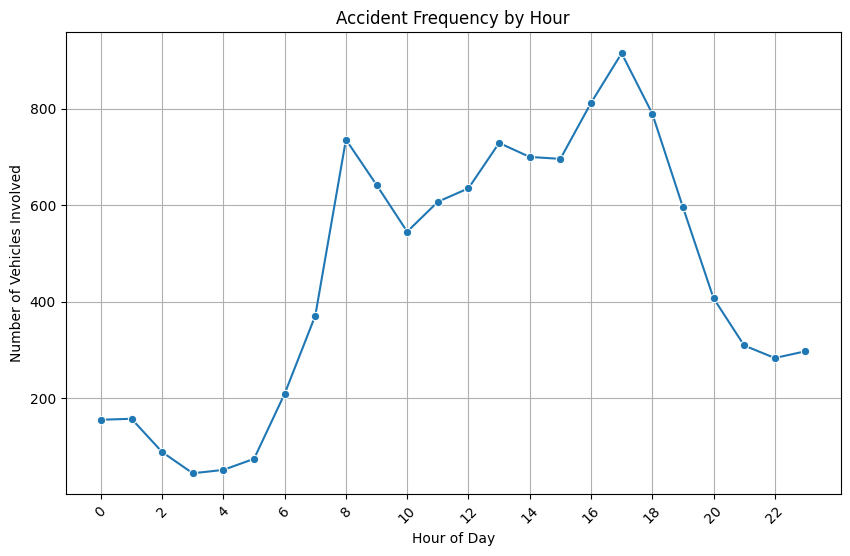

C:\Users\keiru\AppData\Local\Temp\ipykernel_10172\865211205.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weekly_data, x='Day_of_Week', y='Number_of_Vehicles', palette='viridis')


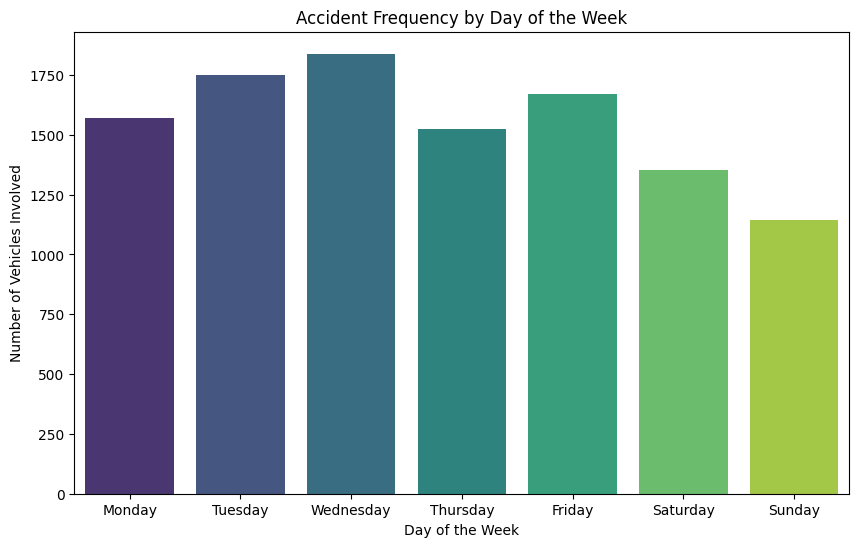

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the line chart for hourly data
plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_data, x='Hour', y='Number_of_Vehicles', marker='o')
plt.title('Accident Frequency by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Vehicles Involved')
plt.grid(True)
plt.xticks(ticks=range(0, 24, 2), rotation=45)  # Adjust labels as needed
plt.show()

# Plot the bar chart for weekly data
plt.figure(figsize=(10, 6))
sns.barplot(data=weekly_data, x='Day_of_Week', y='Number_of_Vehicles', palette='viridis')
plt.title('Accident Frequency by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Vehicles Involved')
plt.show()
